# Data preprocessing example

This is an example of how to use the program phifdt_pipe.py

There are 5 steps:
1. Find the level 0 data
2. Apply phifdt_pipe
    1. Sequentially
    2. Using JSON
3. Apply inversion (if not done during preprocessing)

Look into phifdt_pipe.py for getting information about usage and options.

In [1]:
# Loading libraries

import sys

sys.path.append('../../../')  
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pyfits

import sophi_fdt_dpp as fdt


### Find the level 0 data

In [2]:
data_dir = './test_data/level1/'
list_of_files = fdt.list_fits(inpath = data_dir,contain='phi-fdt-ilam',remove_dir=True)
print(list_of_files)

['solo_L1_phi-fdt-ilam_20220308T070009_V202203210602C_0243080501.fits.gz', 'solo_L1_phi-fdt-ilam_20220308T071009_V202203210602C_0243080502.fits.gz', 'solo_L1_phi-fdt-ilam_20220308T072009_V202203210602C_0243080503.fits.gz']


In [7]:
"""
Looking for dark and flat files and prefilter files
"""

root_directory = "/Volumes/SOPHI_data/PHI-NMP/"
dark_path = f'{root_directory}/CAL_DATA/DARKS/'
dark_file = f'{dark_path}solo_L1_phi-fdt-dark_20220322T133747_V202207012038C_0223221001.fits.gz'

prefilter_path = f'{root_directory}/CAL_DATA/PREFILTER/'
prefilter_file = f'{prefilter_path}0000990710_noMeta.fits'

flat_path = f'{root_directory}/CAL_DATA/FLATS/'
flat_file = f'{flat_path}solo_L1_phi-fdt-flatm_20220303T040009_V202203121742C_0263031100.fits.gz'

output_dir = './test_data/'



### Apply phifdt_pipe()

 Using sequencial mode  
    (hopefully with the right inputs since ERROR handling is not yet fully in place)  
{'ATT_FACTOR': 1e-06,
 'FDT_MOD_ROTATION_ANGLE': -127.6,
 'FIGUREOUT': '.png',
 'FIVE_SIGMA': 5,
 'FLAT_MEDIAN_FILTER': 9.0,
 'ItoQUV': True,
 'NFREQ_LEVEL': 0.0,
 'PERCENT_OF_DISK_FOR_CROSST': 0.9,
 'PERCENT_OF_DISK_FOR_FLAT_NORM': 0.3,
 'PERCENT_OF_DISK_FOR_MASKI': 0.9,
 'PERCENT_OF_DISK_FOR_NORMALIZATION': 0.2,
 'PLT_RNG': 5,
 'RTE_code': 'pmilos',
 'RTE_options': None,
 'SIGMA_MEDIAN_FILTER': 30.0,
 'SIX_FLATS': False,
 'USE_CONT_FLAT': False,
 'VtoQU': False,
 'calculate_shifts': True,
 'cavity_file': None,
 'center_method': 'circlefit',
 'correct_cavity': False,
 'correct_distortion': False,
 'correct_fringes': False,
 'correct_ghost': False,
 'crosstalk_order': 1.0,
 'dark_c': True,
 'dark_f': '/Volumes/SOPHI_data/PHI-NMP//CAL_DATA/DARKS/solo_L1_phi-fdt-dark_20220322T133747_V202207012038C_0223221001.fits.gz',
 'data_f': 'solo_L1_phi-fdt-ilam_20220308T070009_V2022032106

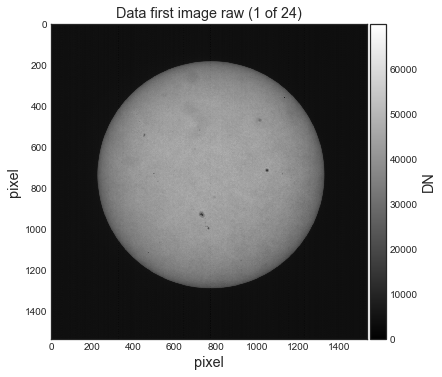

Data dimensions:  256 1791 256 1791
         data cropped to: [ 256 , 1791 ],[ 256 , 1791 ]
-->>>>>>> Reading Darks                   
          Input should be [y-dim,x-dim].
          DARK IS DIVIDED by 256.   
-->>>>>>> Scaling data... 
Dataset downloaded as raw: no bit convert scaling needed
max range  81920 81920 1.0
Dark DID:  0223221001
          checking scaling and correcting for it in the dark. {'Present': [False, True], 'scaling': [0.0, 81920.0]} {'Present': [True, True], 'scaling': [127.0, 81920.0]} 0.0
0.0 scaling
-->>>>>>> Correcting dark current.
Cropping calibration data to match science data


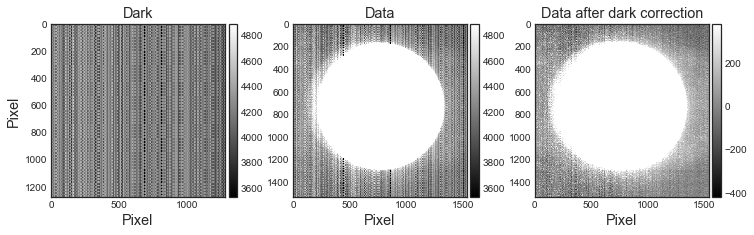

Instrument FDT PMP temperatures
-------------------------------------------------------
            FPMPTSP[1,2] = 40 , 40
            FPMP[1,2]PT1 = 39.96 , 40.27
            FPMP[1,2]PT2 = 39.96 , 40.27
-------------------------------------------------------
-->>>>>>> Obtaining voltages from data 
-- Obtaining sampling information from......./test_data/level1/solo_L1_phi-fdt-ilam_20220308T070009_V202203210602C_0243080501.fits.gz
-- Only works for nominal six wavelength scan data. Line scan and PD are not supported yet.
continuum was taken in the RED and stored in the RED
          Data FG voltages:  [-1106.  -908.  -710.  -511.  -315.   133.]
          Data continuum position at wave:  5
          Data roll position of continuum:  Continuum stored in right position
          Data index elements:  [0 1 2 3 4 5]
          Data ref_wavelength [mA]:  6173.341
          Data wave axis [mA]:  [6172.7701622 6172.8397196 6172.909277  6172.9791857 6173.0480405
 6173.2054229]
          Data wa

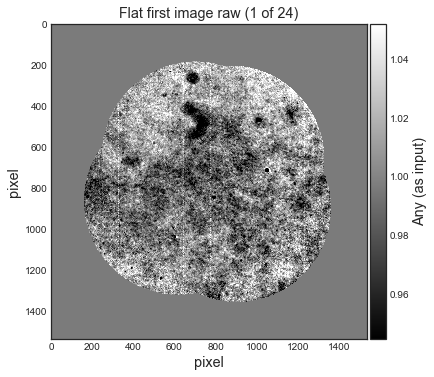

-->>>>>>> No distortion correction
-->>>>>>> Correcting Flatfield
  ... pol:  0  wave:  0  index:  [data / flat] index:  0  ,  0
  ... pol:  0  wave:  1  index:  [data / flat] index:  1  ,  1
  ... pol:  0  wave:  2  index:  [data / flat] index:  2  ,  2
  ... pol:  0  wave:  3  index:  [data / flat] index:  3  ,  3
  ... pol:  0  wave:  4  index:  [data / flat] index:  4  ,  4
  ... pol:  0  wave:  5  index:  [data / flat] index:  5  ,  5
  ... pol:  1  wave:  0  index:  [data / flat] index:  0  ,  0
  ... pol:  1  wave:  1  index:  [data / flat] index:  1  ,  1
  ... pol:  1  wave:  2  index:  [data / flat] index:  2  ,  2
  ... pol:  1  wave:  3  index:  [data / flat] index:  3  ,  3
  ... pol:  1  wave:  4  index:  [data / flat] index:  4  ,  4
  ... pol:  1  wave:  5  index:  [data / flat] index:  5  ,  5
  ... pol:  2  wave:  0  index:  [data / flat] index:  0  ,  0
  ... pol:  2  wave:  1  index:  [data / flat] index:  1  ,  1
  ... pol:  2  wave:  2  index:  [data / flat] index

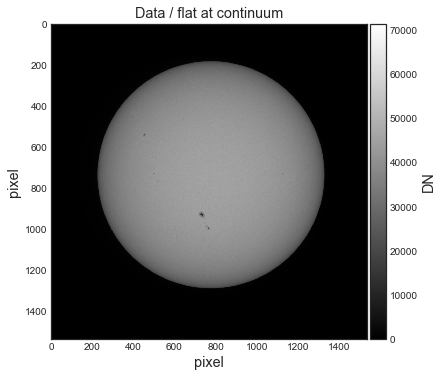

-->>>>>>> No ghost correction
-->>>>>>> Read prefilter and correct for it 
           /Volumes/SOPHI_data/PHI-NMP//CAL_DATA/PREFILTER/0000990710_noMeta.fits    
Cropping calibration data to match science data
iter 0 wvlCurr -1106.0
iter 0 valueClosest -1103
iter 0 indexClosest 3
mean prefValue Before: 256.1553649902344
mean prefValue After: 256.3633117675781
distance1: 63.0
distance2: 3.0
percentage: 0.045454545454545456
mean prefilter: 256.35387385352647
mean prefilter: 1.0013823197403378
iter 1 wvlCurr -908.0
iter 1 valueClosest -907
iter 1 indexClosest 6
mean prefValue Before: 256.71533203125
mean prefValue After: 256.85107421875
distance1: 64.0
distance2: 1.0
percentage: 0.015384615384615385
mean prefilter: 256.84898036821846
mean prefilter: 1.0033163295633534
iter 2 wvlCurr -710.0
iter 2 valueClosest -710
iter 2 indexClosest 9
mean prefValue Before: 257.045654296875
mean prefValue After: 257.098388671875
distance1: 66.0
distance2: 0.0
percentage: 0.0
mean prefilter: 257.0984237717

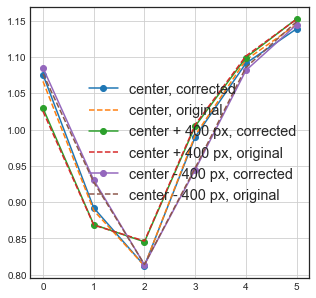

-->>>>>>> Demodulating data...         
Demodulation matrix for  FDT40
[[ 0.16559717  0.36621064  0.17106811  0.29602755]
 [ 0.56854971  0.25095826 -0.34137648 -0.48025649]
 [-0.5408319   0.38391054  0.58947885 -0.43166375]
 [-0.35135625  0.46441998 -0.58284213  0.4637898 ]]


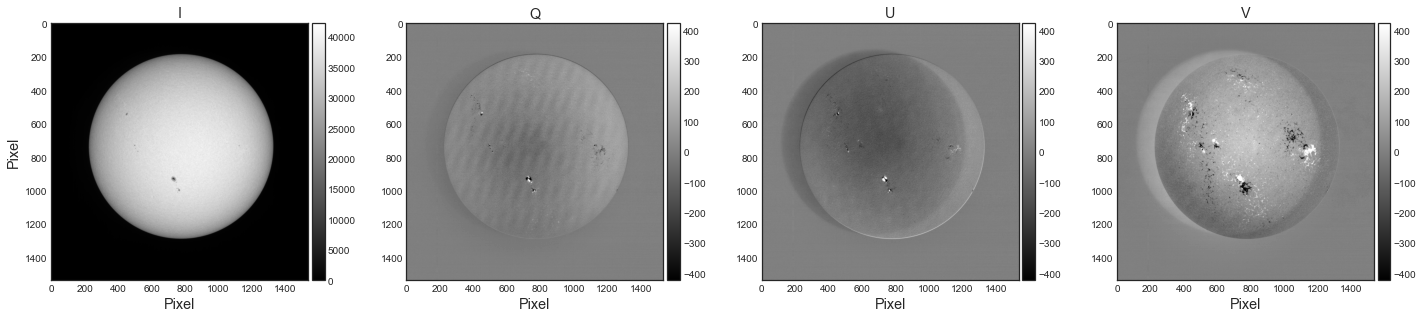

-->>>>>>> Applying normalization --
          Norma is:  44652.38092259062  evaluated in  20.0  % of the disk


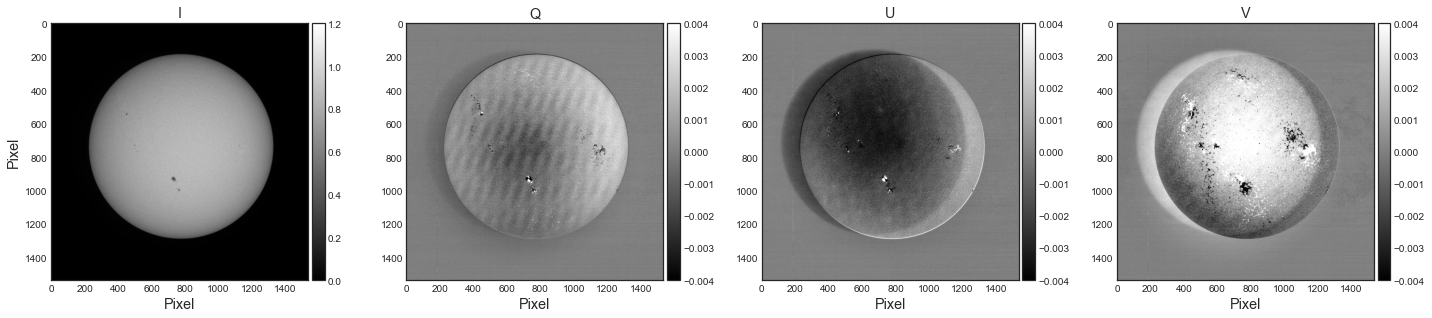

-->>>>>>> Cross-talk correction from Stokes I to Stokes Q,U,V --
          Using  90.0 % of the disk                     
          and mode  standard
                     wave_range: [0 1 2 3 4 5]
mask inside `crosstalk_ItoQUV`, has been provided
Cross-talk from I to Q: slope =  -0.0009 ; off-set =   0.0013 
Cross-talk from I to U: slope =  -0.0025 ; off-set =   0.0007 
Cross-talk from I to V: slope =   0.0056 ; off-set =  -0.0028 


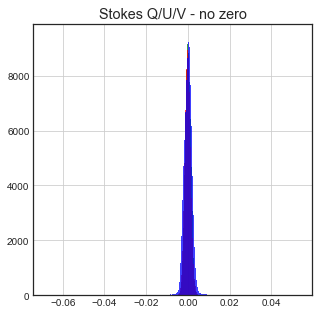

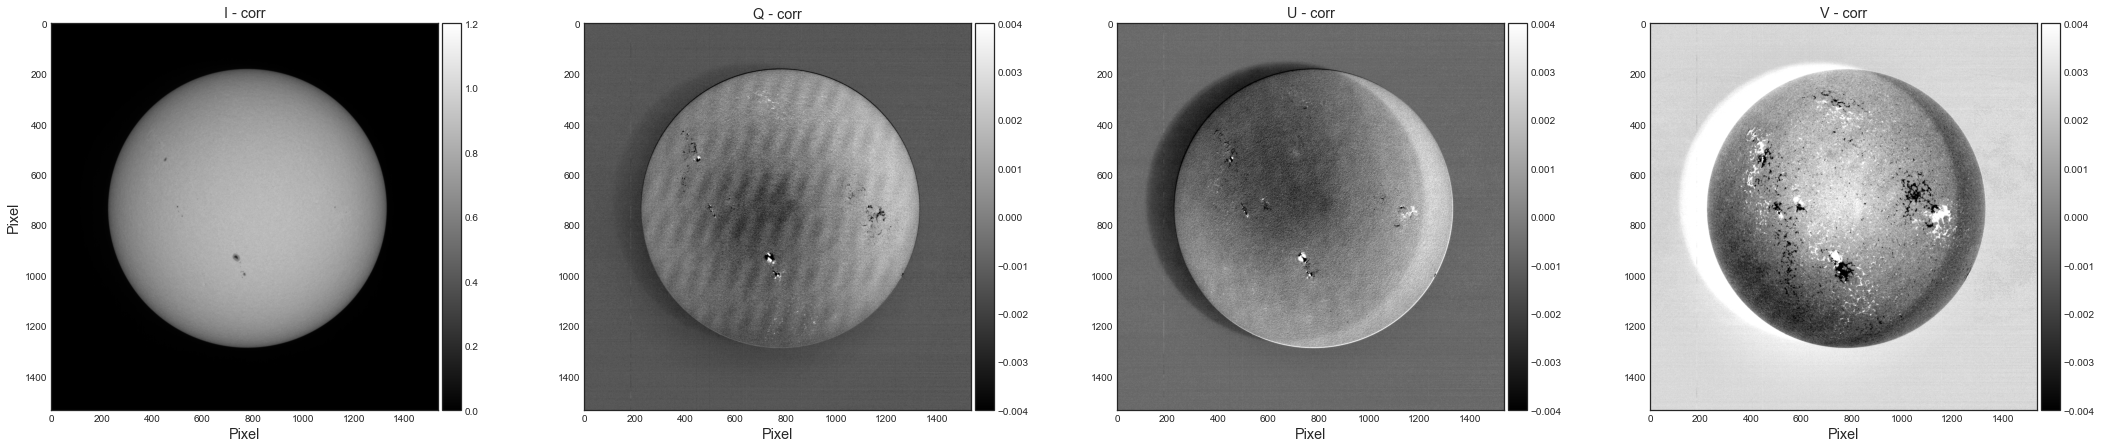

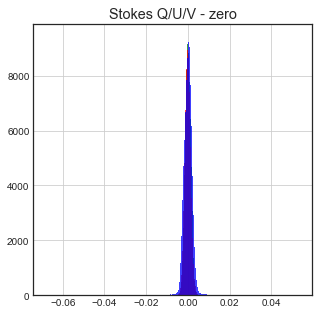

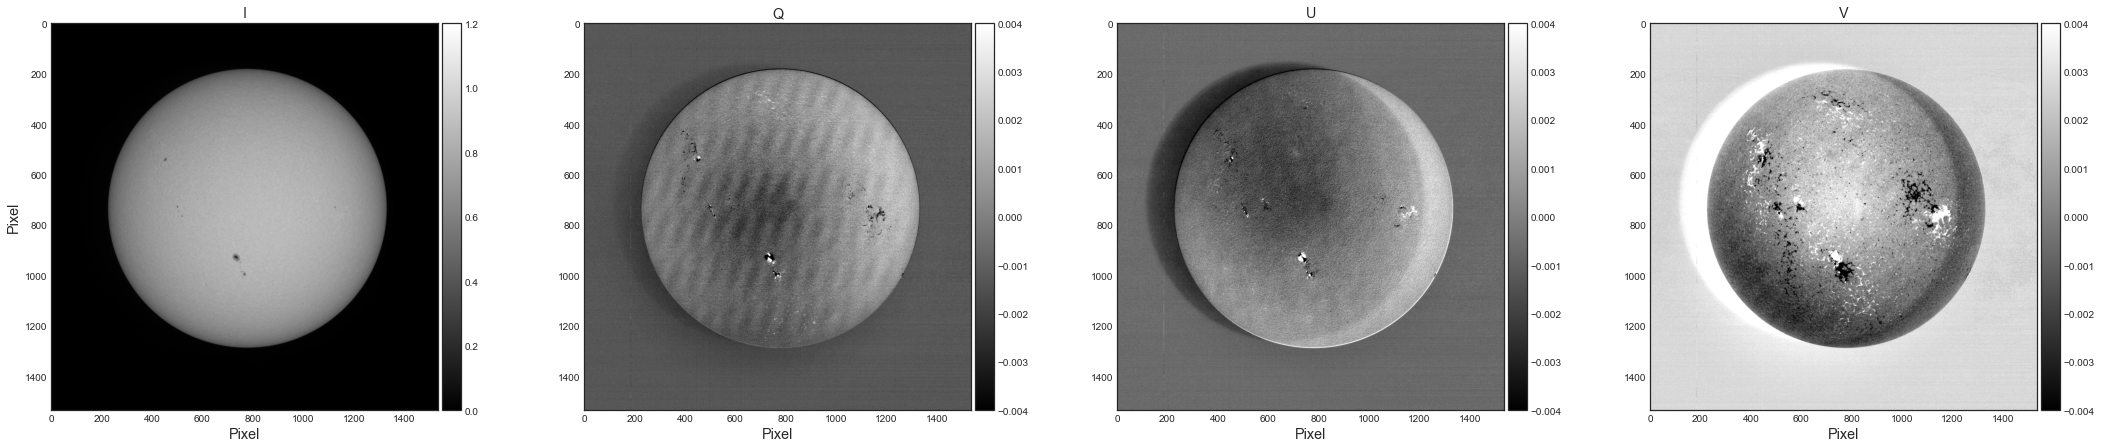

./test_data/pngs folder already exists.
./test_data/level2 folder already exists.
---------------------------------------------------------
 Saving data to:  ./test_data/level2/solo_L2_phi-fdt-stokes_20220308T070009_V01_0243080501.fits.gz
---------------------RUNNING CMILOS --------------------------
Centering...
   It is assumed the wavelength is given by the header info 
         wave axis:  [6173.2018852 6173.2714426 6173.341     6173.4109087 6173.4797635
 6173.6371459]
         wave axis (step):   [-139.1148  -69.5574    0.       69.9087  138.7635  296.1459]
         reference wavelength:   6173.341
-------------------------------------------------------------- 
  cmilos version: CMILOS v0.91 (July - 2021) 
-------------------------------------------------------------- 
No input options. Setting for PHI only.
RTE_MODE  CE
options:  [ 6. 30.  2.  0.  0.  0.  0.]
Using PMILOS version
   input shape in phi_rte:  (6, 4, 1536, 1536)
   reshaping into:  (6, 4, 2359296)
   reshaping data.

<Figure size 2592x648 with 0 Axes>

<Figure size 2592x648 with 0 Axes>

<Figure size 2592x648 with 0 Axes>

<Figure size 2592x648 with 0 Axes>

<Figure size 2592x648 with 0 Axes>

<Figure size 2592x648 with 0 Axes>

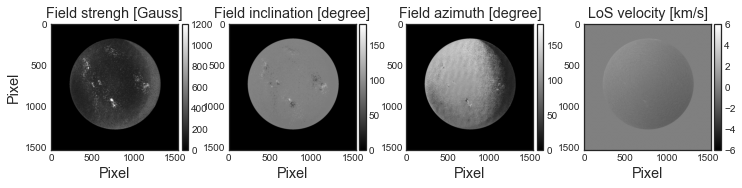

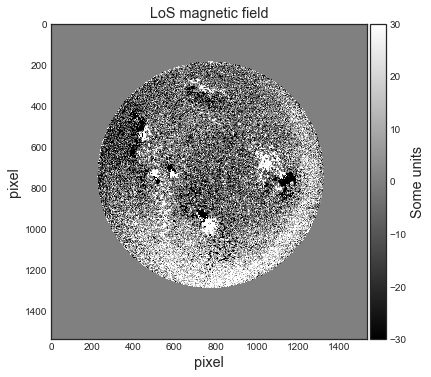

Writing fits:  ./test_data/level2/solo_L2_phi-fdt-bmag_20220308T070009_V01_0243080501.fits.gz
Writing fits:  ./test_data/level2/solo_L2_phi-fdt-binc_20220308T070009_V01_0243080501.fits.gz
Writing fits:  ./test_data/level2/solo_L2_phi-fdt-bazi_20220308T070009_V01_0243080501.fits.gz
Writing fits:  ./test_data/level2/solo_L2_phi-fdt-blos_20220308T070009_V01_0243080501.fits.gz
Writing fits:  ./test_data/level2/solo_L2_phi-fdt-vlos_20220308T070009_V01_0243080501.fits.gz
Writing fits:  ./test_data/level2/solo_L2_phi-fdt-icnt_20220308T070009_V01_0243080501.fits.gz
Writing fits:  ./test_data/level2/solo_L2_phi-fdt-chi2_20220308T070009_V01_0243080501.fits.gz
  ---- >>>>> Saving plots.... 
Writing observables png:  ./test_data/pngs/solo_L2_phi-fdt-plot_20220308T070009_V01_0243080501.png
Writing Chi2 png:  ./test_data/pngs/solo_L2_phi-fdt-chi2_20220308T070009_V01_0243080501.png
--------------------- END  ----------------------------


In [8]:
data,header = fdt.phifdt_pipe(data_f = list_of_files[0],input_data_dir = data_dir, dark_f = dark_file,flat_f = flat_file, prefilter=True,
    instrument = 'auto', prefilter_fits = prefilter_file,shrink_mask = 1,correct_ghost = False, verbose = True,
    correct_fringes=False,fringe_threshold = 2.5,ItoQUV=True,center_method = "circlefit",output_dir = output_dir,rte = 'CE',RTE_code="pmilos",
    vers = '01',normalize_flat=True, PERCENT_OF_DISK_FOR_CROSST=0.9)

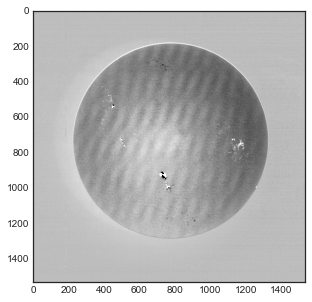

In [9]:
plt.imshow(data[0,1,:,:],vmin=-0.005,vmax=0.005)